<a href="https://colab.research.google.com/github/fkvivid/DIVER/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd 
from keras.datasets import mnist
# Evaluation index
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [43]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

data = pd.DataFrame(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [44]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [45]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [46]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

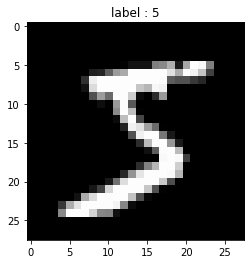

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


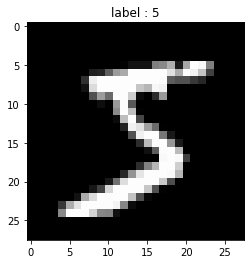

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [48]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

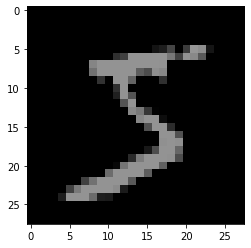

In [49]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [50]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


1.0
0.0


In [51]:
# Split into training data and validation data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape)
print(X_val.shape)

(48000, 784)
(12000, 784)


In [52]:
# One-hot encoding of correct label value
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(48000,)
(48000, 10)
float64


In [53]:
# Mini-batch processing class
class GetMiniBatch:
    """
    Iterator to get the mini-batch

    Parameters
    ----------
    X : ndarray of the following form, shape (n_samples, n_features)
      Training data
    y : ndarray of the following form, shape (n_samples, 1)
      correct value
    batch_size : int
      Batch Size
    seed : int
      Seeding random numbers in NumPy
    """
    def __init__(self, X, y, batch_size = 20, seed=None):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [54]:
# Mini-batch processing
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # Can get the fifth mini-batch.

for mini_X_train, mini_y_train in get_mini_batch:
    # You can use a mini-batch within this for statement
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([6, 6, 4, 7, 3, 6, 6, 2, 1, 1, 0, 2, 5, 0, 4, 8, 3, 1, 4, 4],
      dtype=uint8))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [55]:
# Scratch Neural Network
class ScratchSimpleNeuralNetrowkClassifier():
    """
    A simple three-layer neural network classifier
    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, n_epoch=50, n_features=784, n_nodes1=400, n_nodes2=200, 
                 n_output=10, sigma=0.01, n_batch=20, 
                 activate_function_key='tanh', lr = 0.01, verbose = False):
        
        self.n_epoch = n_epoch
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.n_batch = n_batch
        self.activate_function_key = activate_function_key
        self.lr = lr
        self.verbose = verbose
        
    def initial_weight(self):
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.b1 = np.zeros(self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.b2 = np.zeros(self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.b3 = np.zeros(self.n_output)
        
    def activation_function(self,X):
        if self.activate_function_key == 'sigmoid':
            return 1/(1+np.exp(-X))
        
        elif self.activate_function_key == 'tanh':
            return np.tanh(X)
    
    def softmax(self,X):
        
        return np.exp(X-np.max(X))/np.sum(np.exp(X-np.max(X)),axis=1,keepdims=True)
    
    def loss_function(self,y,yt):
        delta = 1e-7
        return -np.mean(yt*np.log(y+delta))
    
    def gradient_descent(self,X,y,yt):
        
            # 3rd layer
            delta_a3 = (y-yt)/self.n_batch
            delta_b3 = np.sum(delta_a3,axis=0)
            delta_W3 = np.dot(self.z2.T,delta_a3)
            delta_z2 = np.dot(delta_a3,self.W3.T)
        
            self.W3 -= self.lr*delta_W3
            self.b3 -= self.lr*delta_b3
        
            # 2nd layer
            if self.activate_function_key == 'sigmoid':
                delta_a2 = delta_z2*(1-self.activation_function(self.z2))*self.activation_function(self.z2)
            
            elif self.activate_function_key == 'tanh':
                delta_a2 = delta_z2*(1-np.tanh(self.z2)**2)
            
            delta_b2 = np.sum(delta_a2,axis=0)
            delta_W2 = np.dot(self.z1.T,delta_a2)
            delta_z1 = np.dot(delta_a2,self.W2.T)
        
            self.W2 -= self.lr*delta_W2
            self.b2 -= self.lr*delta_b2
        
            # 1st layer
            if self.activate_function_key == 'sigmoid':
                delta_a1 = delta_z1*(1-self.activation_function(self.z1))*self.activation_function(self.z1)
            
            elif self.activate_function_key == 'tanh':
                delta_a1 = delta_z1*(1-np.tanh(self.z1)**2)
                
            delta_b1 = np.sum(delta_a1,axis=0)
            delta_W1 = np.dot(X.T,delta_a1)
        
            self.W1 -= self.lr*delta_W1
            self.b1 -= self.lr*delta_b1
                
    def fit(self, X, y, X_val=False, y_val=False):
        """
        Train a neural network classifier.。

        Parameters
        ----------
        X : ndarray of the following form, shape (n_samples, n_features)
            Features of training data
        y : ndarray of the following form, shape (n_samples, )
            Correct answer value of training data
        X_val : ndarray of the following form, shape (n_samples, n_features)
            Features of validation data
        y_val : ndarray of the following form, shape (n_samples, )
            Correct value of validation data
        """
        # Initialize weights
        self.initial_weight()
        
        # List to record the loss_function for each epoch
        self.log_loss = []
        self.log_loss_val = []
        
        # Evaluate the estimation of Train data per epoch: Accuracy
        self.log_acc = []
        self.log_acc_val = []
        
        for epoch in range(self.n_epoch):
            # Mini-batch processing
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.n_batch)
            
            self.loss = 0
            self.true_y = np.array([])
            self.pred_y = np.array([])
            
            for mini_X_train, mini_y_train in get_mini_batch:
            
                # 1st layer
                self.z1 = self.activation_function(np.dot(mini_X_train,self.W1) + self.b1)
            
                # 2nd layer
                self.z2 = self.activation_function(np.dot(self.z1,self.W2) + self.b2)
            
                # 3rd layer (softmax function)
                yhat = self.softmax(np.dot(self.z2,self.W3) + self.b3)
                
                # Backpropagation (stochastic gradient descent method)）
                self.gradient_descent(mini_X_train,yhat,mini_y_train)
                
                # Record correct and estimated values for mini-batch data
                self.true_y = np.concatenate([self.true_y,np.argmax(mini_y_train,axis=1)])
                self.pred_y = np.concatenate([self.pred_y,np.argmax(yhat,axis=1)])
                
                # Loss function
                self.loss += self.loss_function(yhat,mini_y_train)
            
            # Record the loss function for each epoch
            self.log_loss.append(self.loss/len(get_mini_batch))
            
            # Accuracy
            acc = accuracy_score(self.true_y, self.pred_y)
            self.log_acc.append(acc)
            
            # Calculate once Val data has been entered
            if (type(X_val) != bool):
                # 1st layer
                self.z1_val = self.activation_function(np.dot(X_val,self.W1) + self.b1)
            
                # 2nd layer
                self.z2_val = self.activation_function(np.dot(self.z1_val,self.W2) + self.b2)
            
                # 3rd layer (softmax function)
                yhat_val = self.softmax(np.dot(self.z2_val,self.W3) + self.b3)
                
                # Loss function
                self.loss_val = self.loss_function(yhat_val,y_val)
                self.log_loss_val.append(self.loss_val)
                
                # Accuracy
                
                acc_val = accuracy_score(np.argmax(y_val,axis=1), np.argmax(yhat_val,axis=1))
                self.log_acc_val.append(acc_val)
            
            #When verbose is set to true, output the learning process and other information.
            if self.verbose:
                print('epoch:{:>3} loss:{:>8,.3f} acc:{:>5,.3f}'.format(epoch,self.loss/self.n_batch,acc))
            
    def predict(self, X):
        """
        Estimate using a neural network classifier.。

        Parameters
        ----------
        X : ndarray of the following form, shape (n_samples, n_features)
            Sample

        Returns
        -------
            ndarray of the following form, shape (n_samples, 1)
            Estimation results
        """
        # 1st layer
        self.pred_z1 = self.activation_function(np.dot(X,self.W1) + self.b1)
            
        # 2nd layer
        self.pred_z2 = self.activation_function(np.dot(self.pred_z1,self.W2) + self.b2)
        
        return np.argmax(np.dot(self.pred_z2,self.W3) + self.b3, axis=1)

【Problem 1】Create the code to determine the initial values of the weights

In [56]:
# Initial value of weight
n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output =10

# Standard deviation of Gaussian distribution
sigma = 0.01 
W1 = sigma * np.random.randn(n_features, n_nodes1)
print('W1',W1.shape)

W1 (784, 400)


In [57]:
W1 = sigma * np.random.randn(n_features, n_nodes1)
b1 = sigma * np.random.randn(n_nodes1)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
b2 = sigma * np.random.randn(n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)
b3 = sigma * np.random.randn(n_output)

print('W1',W1.shape)
print('W2',W2.shape)
print('W3',W3.shape)
print('b1',b1.shape)
print('b2',b2.shape)
print('b3',b3.shape)

W1 (784, 400)
W2 (400, 200)
W3 (200, 10)
b1 (400,)
b2 (200,)
b3 (10,)


【Problem 2】Implementing Forward Propagation

In [58]:
X = X_train[0:20]

In [59]:
# Linear combination of the first layer
z1 = np.dot(X,W1)# + b1
print('z1.shape:',z1.shape)
print(z1)

z1.shape: (20, 400)
[[ 0.13749778 -0.19070315 -0.02626912 ...  0.02904882  0.15179103
   0.1909522 ]
 [ 0.13481647 -0.00642852 -0.05299622 ...  0.07191606  0.09461432
  -0.100933  ]
 [ 0.07256482 -0.12694961  0.00908503 ... -0.12059174 -0.01361922
   0.19475775]
 ...
 [ 0.13214172 -0.16938497 -0.044017   ...  0.04018174  0.1251121
   0.01353298]
 [ 0.19479469 -0.1560178   0.22064804 ...  0.02614014 -0.0395107
   0.15186824]
 [ 0.07922762 -0.02079644 -0.07355451 ... -0.10083866 -0.04885305
   0.1536463 ]]


In [60]:
# Activation function for the first layer
sig1 = 1/(1+np.exp(-z1))
print('sig1.shape:',sig1.shape)
print(sig1)

sig1.shape: (20, 400)
[[0.53432039 0.45246818 0.4934331  ... 0.5072617  0.53787506 0.54759352]
 [0.53365316 0.49839288 0.48675404 ... 0.51797127 0.52363595 0.47478815]
 [0.51813325 0.46830515 0.50227124 ... 0.46988855 0.49659525 0.54853612]
 ...
 [0.53298744 0.45775471 0.48899753 ... 0.51004408 0.53123729 0.50338319]
 [0.54854526 0.46107448 0.55493929 ... 0.50653466 0.49012361 0.53789425]
 [0.51979655 0.49480108 0.48161966 ... 0.47481168 0.48778917 0.53833619]]


In [61]:
# Linear combination of the second layer
z2 = np.dot(sig1,W2) + b2
print('z2.shape:',z2.shape)
print(z2)


z2.shape: (20, 200)
[[ 0.0824229   0.04256144 -0.13678027 ... -0.01374205  0.03493914
   0.09721402]
 [ 0.07937431  0.04318334 -0.13672319 ... -0.00773169  0.03635739
   0.09639327]
 [ 0.08215042  0.04862838 -0.13316305 ... -0.00992917  0.04010321
   0.09718111]
 ...
 [ 0.07518004  0.04195083 -0.14022183 ... -0.0151435   0.04141123
   0.09896352]
 [ 0.08235404  0.04256734 -0.1383939  ... -0.01341341  0.04013059
   0.10225433]
 [ 0.08083998  0.04495457 -0.13824667 ... -0.00456395  0.03614244
   0.09629062]]


In [62]:
# Activation function for the second layer
sig2 = 1/(1+np.exp(-z2))
print('sig2.shape:',sig2.shape)
print(sig2)

sig2.shape: (20, 200)
[[0.52059407 0.51063875 0.46585815 ... 0.49656454 0.5087339  0.52428438]
 [0.51983317 0.51079416 0.46587235 ... 0.49806709 0.50908835 0.52407968]
 [0.52052606 0.5121547  0.46675834 ... 0.49751773 0.51002446 0.52427618]
 ...
 [0.51878616 0.51048617 0.46500187 ... 0.4962142  0.51035133 0.52472071]
 [0.52057688 0.51064023 0.46545664 ... 0.4966467  0.5100313  0.52554133]
 [0.520199   0.51123675 0.46549327 ... 0.49885902 0.50903463 0.52405407]]


In [63]:
# 3rd layer linear combination
z3 = np.dot(sig2,W3) + b3
print('z3.shape:',z3.shape)
print(z3)

z3.shape: (20, 10)
[[-7.62327983e-02  3.25510915e-04  1.57625937e-01 -4.98673435e-02
  -1.02643469e-01 -3.22479283e-02  1.49102027e-01 -1.51757736e-01
   2.68747016e-02  4.64703853e-02]
 [-7.61198297e-02  6.98612573e-05  1.57596105e-01 -4.98648734e-02
  -1.02614090e-01 -3.23284877e-02  1.49385419e-01 -1.51397930e-01
   2.69848934e-02  4.64766403e-02]
 [-7.64894894e-02  2.45001733e-04  1.57260479e-01 -4.99009737e-02
  -1.02583208e-01 -3.22989762e-02  1.49083002e-01 -1.51786801e-01
   2.67014472e-02  4.62168172e-02]
 [-7.63100389e-02  2.46156757e-04  1.57625837e-01 -4.98200278e-02
  -1.02483029e-01 -3.24422900e-02  1.49187927e-01 -1.51735076e-01
   2.68122724e-02  4.63351670e-02]
 [-7.62196447e-02  2.08156927e-04  1.57712372e-01 -4.98118851e-02
  -1.02508976e-01 -3.26664091e-02  1.49168045e-01 -1.51527086e-01
   2.67480398e-02  4.61559230e-02]
 [-7.64515168e-02  2.19645020e-04  1.57318907e-01 -4.97265563e-02
  -1.02560314e-01 -3.23478806e-02  1.49154870e-01 -1.51602824e-01
   2.66138017e

In [64]:
# 3rd layer activation function (softmax function)
sfmax = np.zeros([len(X),10])
for i in range(20):
    sfmax[i] = np.exp(z3[i])/np.sum(np.exp(z3[i]),axis=0)
print('sfmax.shape:',sfmax.shape)
print(sfmax)
print(np.sum(sfmax))

sfmax.shape: (20, 10)
[[0.09252571 0.09988753 0.11690309 0.09499764 0.09011403 0.09668627
  0.11591085 0.08579508 0.10257498 0.10460483]
 [0.09253133 0.09985678 0.1168935  0.09499291 0.09011197 0.09667343
  0.11593765 0.08582147 0.10258093 0.10460002]
 [0.09251364 0.09989209 0.11687512 0.09500643 0.09013083 0.09669354
  0.11592327 0.08580341 0.10257015 0.10459151]
 [0.09252074 0.09988196 0.11690583 0.09500437 0.09013061 0.09666976
  0.11592354 0.08579904 0.10257099 0.10459315]
 [0.0925308  0.09987999 0.11691809 0.09500688 0.09012993 0.09664987
  0.11592336 0.08581846 0.10256629 0.10457632]
 [0.09251341 0.09988552 0.11687722 0.09501916 0.09012925 0.0966849
  0.11592691 0.08581572 0.10255701 0.1045909 ]
 [0.09251756 0.09989236 0.11688793 0.09501491 0.09011219 0.09668263
  0.11593615 0.08578455 0.10257501 0.10459672]
 [0.09252467 0.09988328 0.11687665 0.0950018  0.0901161  0.09667045
  0.11592661 0.08579591 0.10258987 0.10461466]
 [0.09251343 0.0998758  0.11689551 0.09500318 0.09012052 0.

In [65]:
# Calculate without a for statement
softmax = np.exp(z3).T/np.sum(np.exp(z3),axis=1)
print('softmax.shape:',softmax.shape)
print(softmax.T)
print(np.sum(softmax))

softmax.shape: (10, 20)
[[0.09252571 0.09988753 0.11690309 0.09499764 0.09011403 0.09668627
  0.11591085 0.08579508 0.10257498 0.10460483]
 [0.09253133 0.09985678 0.1168935  0.09499291 0.09011197 0.09667343
  0.11593765 0.08582147 0.10258093 0.10460002]
 [0.09251364 0.09989209 0.11687512 0.09500643 0.09013083 0.09669354
  0.11592327 0.08580341 0.10257015 0.10459151]
 [0.09252074 0.09988196 0.11690583 0.09500437 0.09013061 0.09666976
  0.11592354 0.08579904 0.10257099 0.10459315]
 [0.0925308  0.09987999 0.11691809 0.09500688 0.09012993 0.09664987
  0.11592336 0.08581846 0.10256629 0.10457632]
 [0.09251341 0.09988552 0.11687722 0.09501916 0.09012925 0.0966849
  0.11592691 0.08581572 0.10255701 0.1045909 ]
 [0.09251756 0.09989236 0.11688793 0.09501491 0.09011219 0.09668263
  0.11593615 0.08578455 0.10257501 0.10459672]
 [0.09252467 0.09988328 0.11687665 0.0950018  0.0901161  0.09667045
  0.11592661 0.08579591 0.10258987 0.10461466]
 [0.09251343 0.0998758  0.11689551 0.09500318 0.09012052 

In [66]:
# without a for statement - part2
softmax = np.exp(z3)/np.sum(np.exp(z3),axis=1,keepdims=True)
print('softmax.shape:',softmax.shape)
print(softmax)
print(np.sum(softmax))

softmax.shape: (20, 10)
[[0.09252571 0.09988753 0.11690309 0.09499764 0.09011403 0.09668627
  0.11591085 0.08579508 0.10257498 0.10460483]
 [0.09253133 0.09985678 0.1168935  0.09499291 0.09011197 0.09667343
  0.11593765 0.08582147 0.10258093 0.10460002]
 [0.09251364 0.09989209 0.11687512 0.09500643 0.09013083 0.09669354
  0.11592327 0.08580341 0.10257015 0.10459151]
 [0.09252074 0.09988196 0.11690583 0.09500437 0.09013061 0.09666976
  0.11592354 0.08579904 0.10257099 0.10459315]
 [0.0925308  0.09987999 0.11691809 0.09500688 0.09012993 0.09664987
  0.11592336 0.08581846 0.10256629 0.10457632]
 [0.09251341 0.09988552 0.11687722 0.09501916 0.09012925 0.0966849
  0.11592691 0.08581572 0.10255701 0.1045909 ]
 [0.09251756 0.09989236 0.11688793 0.09501491 0.09011219 0.09668263
  0.11593615 0.08578455 0.10257501 0.10459672]
 [0.09252467 0.09988328 0.11687665 0.0950018  0.0901161  0.09667045
  0.11592661 0.08579591 0.10258987 0.10461466]
 [0.09251343 0.0998758  0.11689551 0.09500318 0.09012052 

In [67]:
# High parabolic tangent
np.tanh(z1)

array([[ 0.13663778, -0.18842448, -0.02626308, ...,  0.02904066,
         0.15063589,  0.18866468],
       [ 0.13400558, -0.00642843, -0.05294666, ...,  0.07179233,
         0.094333  , -0.10059164],
       [ 0.07243772, -0.126272  ,  0.00908478, ..., -0.12001056,
        -0.01361838,  0.19233212],
       ...,
       [ 0.13137793, -0.16778339, -0.04398859, ...,  0.04016013,
         0.12446336,  0.01353216],
       [ 0.19236769, -0.1547641 ,  0.21713563, ...,  0.02613419,
        -0.03949016,  0.15071135],
       [ 0.07906226, -0.02079345, -0.07342215, ..., -0.10049825,
        -0.04881422,  0.15244856]])

In [68]:
# High parabolic tangent (verification)
(np.exp(z1)-np.exp(-z1))/(np.exp(z1)+np.exp(-z1))

array([[ 0.13663778, -0.18842448, -0.02626308, ...,  0.02904066,
         0.15063589,  0.18866468],
       [ 0.13400558, -0.00642843, -0.05294666, ...,  0.07179233,
         0.094333  , -0.10059164],
       [ 0.07243772, -0.126272  ,  0.00908478, ..., -0.12001056,
        -0.01361838,  0.19233212],
       ...,
       [ 0.13137793, -0.16778339, -0.04398859, ...,  0.04016013,
         0.12446336,  0.01353216],
       [ 0.19236769, -0.1547641 ,  0.21713563, ...,  0.02613419,
        -0.03949016,  0.15071135],
       [ 0.07906226, -0.02079345, -0.07342215, ..., -0.10049825,
        -0.04881422,  0.15244856]])

【Problem 3】Implement the cross-entropy error

In [69]:
y = y_train_one_hot[0:20]
loss = -y*np.log(sfmax)/len(y)
print('shape:\n',loss.shape)
print(loss)

shape:
 (20, 10)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.11287828]
 [0.         0.         0.         0.         0.         0.11682083
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.11769054 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.11386    0.        ]
 [0.         0.         0.         0.         0.12032515 0.
  0.         0.         0.         0.        ]
 [0.11902009 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.12279582 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.1227892  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.11385745 0.        ]
 [0.        

【Problem 4】Implementing Backpropagation

In [70]:
# 3rd layer
delta_a3 = sfmax-y
delta_b3 = np.sum(delta_a3,axis=0)
delta_W3 = np.dot(z2.T,delta_a3)
delta_z2 = np.dot(delta_a3,W3.T)
print(delta_a3.shape)
print(delta_b3.shape)
print(delta_W3.shape)
print(delta_z2.shape)

(20, 10)
(10,)
(200, 10)
(20, 200)


In [71]:
# 2nd layer
delta_a2 = delta_z2*(1-np.tanh(z2)**2)
delta_b2 = np.sum(delta_a2,axis=0)
delta_W2 = np.dot(z1.T,delta_a2)
delta_z1 = np.dot(delta_a2,W2.T)
print(delta_a2.shape)
print(delta_b2.shape)
print(delta_W2.shape)
print(delta_z1.shape)

(20, 200)
(200,)
(400, 200)
(20, 400)


In [72]:
# 1st layer
delta_a1 = delta_z1*(1-np.tanh(z1)**2)
delta_b1 = np.sum(delta_a1,axis=0)
delta_W1 = np.dot(X.T,delta_a1)
print(delta_a1.shape)
print(delta_b1.shape)
print(delta_W1.shape)

(20, 400)
(400,)
(784, 400)


【Problem 5】Estimation

In [73]:
clf = ScratchSimpleNeuralNetrowkClassifier(n_epoch=30, n_features=784,
                                           n_nodes1=400, n_nodes2=200, n_output=10,
                                           sigma=0.01, n_batch=100,
                                           activate_function_key='tanh',
                                           lr = 0.01, verbose = True)

clf.fit(X_train,y_train_one_hot,X_val,y_val_one_hot)
y_pred = clf.predict(X_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch:  0 loss:   1.101 acc:0.187


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch:  1 loss:   1.077 acc:0.374


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch:  2 loss:   0.838 acc:0.486


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch:  3 loss:   0.511 acc:0.654


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch:  4 loss:   0.362 acc:0.781


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch:  5 loss:   0.290 acc:0.826


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch:  6 loss:   0.250 acc:0.850


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch:  7 loss:   0.224 acc:0.866


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch:  8 loss:   0.207 acc:0.877


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch:  9 loss:   0.195 acc:0.885


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 10 loss:   0.186 acc:0.890


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 11 loss:   0.179 acc:0.894


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 12 loss:   0.174 acc:0.897


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 13 loss:   0.169 acc:0.900


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 14 loss:   0.165 acc:0.902


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 15 loss:   0.162 acc:0.904


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 16 loss:   0.158 acc:0.906


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 17 loss:   0.155 acc:0.908


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 18 loss:   0.153 acc:0.910


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 19 loss:   0.150 acc:0.912


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 20 loss:   0.148 acc:0.913


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 21 loss:   0.145 acc:0.914


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 22 loss:   0.143 acc:0.916


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 23 loss:   0.141 acc:0.917


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 24 loss:   0.138 acc:0.918


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 25 loss:   0.136 acc:0.919


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 26 loss:   0.134 acc:0.920


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 27 loss:   0.132 acc:0.921


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 28 loss:   0.130 acc:0.922


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch: 29 loss:   0.129 acc:0.923


【Problem 6】Learning and Estimation


In [74]:
accuracy = accuracy_score(y_val, y_pred)
#precision = precision_score(y_val, y_pred)
#recall = recall_score(y_val, y_pred)
#f1 = f1_score(y_val, y_pred)

print('accuracy:{:.3f}'.format(accuracy))
#print('precision',precision)
#print('recall',recall)
#print('f1',f1)

accuracy:0.917


【Problem 7】Plotting the Learning Curve

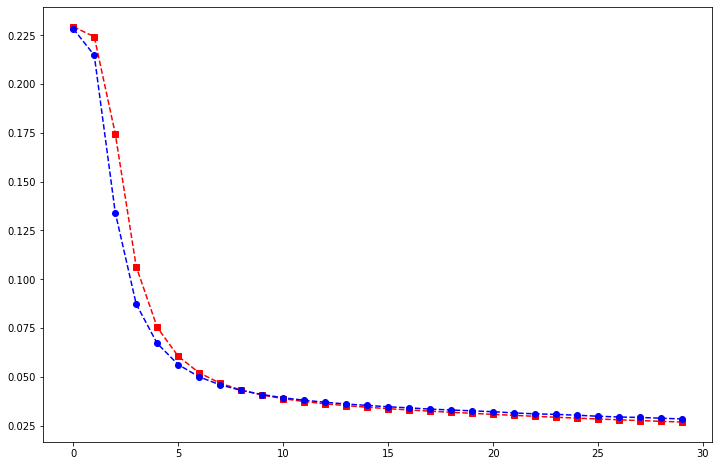

In [75]:
# Visualize the loss function for each epoch
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20

plt.plot(clf.log_loss,'rs--')
plt.plot(clf.log_loss_val,'bo--');

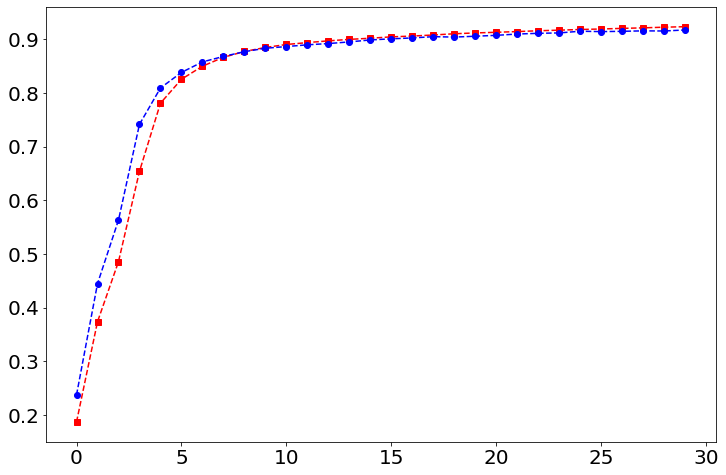

In [76]:
# Visualization of the percentage of correct answers for each epoch
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20

plt.plot(clf.log_acc,'rs--')
plt.plot(clf.log_acc_val,'bo--');

【Problem 8】(Advanced Assignment) Checking for Misclassification

Estimation result / correct answer


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


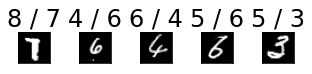

In [77]:
"""
The word classification results are displayed side by side. The upper part of the image shows the "Estimation result / Correct answer".

Parameters:
----------
y_pred : ndarray of estimations (n_samples,)
y_val : Correct answer labels for validation data (n_samples,)
X_val : Features of validation data（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt

num = 5 # How many to display
print('Estimation result / correct answer')

true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')